In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense
import io

idi = '/home/neo11/Documents'

2022-07-22 21:25:37.753705: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
# original model
model = Sequential([
    tf.keras.layers.Dense(37, activation = 'sigmoid', input_shape = (8,)),
    tf.keras.layers.Dense(29, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                333       
                                                                 
 dense_1 (Dense)             (None, 29)                1102      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 1,465
Trainable params: 1,465
Non-trainable params: 0
_________________________________________________________________


2022-07-19 21:29:05.471464: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-19 21:29:05.471573: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neo11-Inspiron-5402): /proc/driver/nvidia/version does not exist
2022-07-19 21:29:05.473177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# training data
path1 = idi + '/APL405_SPA/train_data.csv'
data1 = pd.read_csv(path1)
d = data1.to_numpy()
for i in range(0, 9):
    d[:,i]= (d[:,i] - np.min(d[:,i]))/(np.max(d[:,i]) - np.min(d[:,i]))
y = d[:,0]
x1 = d[:,1:4]
x2 = d[:,4:8]
x3 = d[:,8:10]

In [3]:
path2 = idi + '/APL405_SPA/test_data.csv'
data2 = pd.read_csv(path2)
data2 = data2.sample(frac =1)
d1 = data2.to_numpy()
for i in range(0, 9):
    d1[:,i]= (d1[:,i] - np.min(d1[:,i]))/(np.max(d1[:,i]) - np.min(d1[:,i]))
yt = d1[:,0]
xt1 = d1[:,1:4]
xt2 = d1[:,4:8]
xt3 = d1[:,8:10]

In [4]:
# new model

# geometric parameters
input1 = keras.layers.Input(shape = [3], name = 'geometric paramters')
g1 = keras.layers.Dense(8, activation = 'elu')(input1)
g2 = keras.layers.Dense(16, activation = 'elu')(g1)
g3 = keras.layers.Dense(8, activation = 'relu')(g2)
g4 = keras.layers.Dense(4, activation = 'tanh')(g3)

# material parameters
input2 = keras.layers.Input(shape = [4], name = 'material parameters')
h1 = keras.layers.Dense(16, activation = 'elu')(input2)
h2 = keras.layers.Dense(32, activation = 'relu')(h1)
h3 = keras.layers.Dense(64, activation = 'relu')(h2)
h4 = keras.layers.Dense(32, activation = 'tanh')(h3)
h5 = keras.layers.Dense(16, activation = 'tanh')(h4)

# input pressure
input3 = keras.layers.Input(shape = [2], name = 'pressure')
p1 = keras.layers.Dense(8, activation = 'elu')(input3)
p2 = keras.layers.Dense(4, activation = 'tanh')(p1)
p3 = keras.layers.Dense(2, activation = 'tanh')(p2)

# processes input
new_input = keras.layers.concatenate([g4, h5, p3])

# main neural network
l1 = keras.layers.Dense(32, activation = 'elu')(new_input)
l2 = keras.layers.Dense(64, activation = 'relu')(l1)
l3 = keras.layers.Dense(64, activation = 'elu')(l2)
l4 = keras.layers.Dense(32, activation = 'tanh')(l3)
l5 = keras.layers.Dense(16, activation = 'tanh')(l4)
l6 = keras.layers.Dense(8, activation = 'tanh')(l5)

# model output
output = keras.layers.Dense(1, activation = 'relu', name = 'output')(l6)
model = keras.Model(inputs = [input1, input2, input3], outputs = [output])

# model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 material parameters (InputLaye  [(None, 4)]         0           []                               
 r)                                                                                               
                                                                                                  
 geometric paramters (InputLaye  [(None, 3)]         0           []                               


2022-07-22 21:26:10.830165: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-22 21:26:10.830220: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neo11-Inspiron-5402): /proc/driver/nvidia/version does not exist
2022-07-22 21:26:10.831537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 r)                                                                                               
                                                                                                  
 dense_4 (Dense)                (None, 16)           80          ['material parameters[0][0]']    
                                                                                                  
 dense (Dense)                  (None, 8)            32          ['geometric paramters[0][0]']    
                                                                                                  
 dense_5 (Dense)                (None, 32)           544         ['dense_4[0][0]']                
                                                                                                  
 pressure (InputLayer)          [(None, 2)]          0           []                               
                                                                                                  
 dense_1 (

Epoch 1/3000
3/3 - 2s - loss: 0.0504 - mae: 0.0491 - val_loss: 0.0528 - val_mae: 0.0515 - 2s/epoch - 784ms/step
Epoch 2/3000
3/3 - 0s - loss: 0.0600 - mae: 0.0581 - val_loss: 0.0658 - val_mae: 0.0637 - 152ms/epoch - 51ms/step
Epoch 3/3000
3/3 - 0s - loss: 0.0500 - mae: 0.0486 - val_loss: 0.0501 - val_mae: 0.0489 - 110ms/epoch - 37ms/step
Epoch 4/3000
3/3 - 0s - loss: 0.0497 - mae: 0.0485 - val_loss: 0.0527 - val_mae: 0.0514 - 120ms/epoch - 40ms/step
Epoch 5/3000
3/3 - 0s - loss: 0.0481 - mae: 0.0470 - val_loss: 0.0608 - val_mae: 0.0590 - 207ms/epoch - 69ms/step
Epoch 6/3000
3/3 - 0s - loss: 0.0449 - mae: 0.0438 - val_loss: 0.0486 - val_mae: 0.0475 - 180ms/epoch - 60ms/step
Epoch 7/3000
3/3 - 0s - loss: 0.0424 - mae: 0.0415 - val_loss: 0.0506 - val_mae: 0.0494 - 184ms/epoch - 61ms/step
Epoch 8/3000
3/3 - 0s - loss: 0.0402 - mae: 0.0394 - val_loss: 0.0572 - val_mae: 0.0556 - 192ms/epoch - 64ms/step
Epoch 9/3000
3/3 - 0s - loss: 0.0416 - mae: 0.0406 - val_loss: 0.0535 - val_mae: 0.0521 - 

Epoch 73/3000
3/3 - 0s - loss: 0.0380 - mae: 0.0372 - val_loss: 0.0521 - val_mae: 0.0508 - 84ms/epoch - 28ms/step
Epoch 74/3000
3/3 - 0s - loss: 0.0349 - mae: 0.0343 - val_loss: 0.0532 - val_mae: 0.0519 - 121ms/epoch - 40ms/step
Epoch 75/3000
3/3 - 0s - loss: 0.0359 - mae: 0.0352 - val_loss: 0.0527 - val_mae: 0.0514 - 127ms/epoch - 42ms/step
Epoch 76/3000
3/3 - 0s - loss: 0.0367 - mae: 0.0360 - val_loss: 0.0546 - val_mae: 0.0531 - 91ms/epoch - 30ms/step
Epoch 77/3000
3/3 - 0s - loss: 0.0374 - mae: 0.0367 - val_loss: 0.0498 - val_mae: 0.0486 - 161ms/epoch - 54ms/step
Epoch 78/3000
3/3 - 0s - loss: 0.0377 - mae: 0.0370 - val_loss: 0.0504 - val_mae: 0.0492 - 165ms/epoch - 55ms/step
Epoch 79/3000
3/3 - 0s - loss: 0.0358 - mae: 0.0351 - val_loss: 0.0495 - val_mae: 0.0484 - 180ms/epoch - 60ms/step
Epoch 80/3000
3/3 - 0s - loss: 0.0353 - mae: 0.0347 - val_loss: 0.0506 - val_mae: 0.0494 - 184ms/epoch - 61ms/step
Epoch 81/3000
3/3 - 0s - loss: 0.0346 - mae: 0.0339 - val_loss: 0.0498 - val_mae: 

Epoch 145/3000
3/3 - 0s - loss: 0.0354 - mae: 0.0348 - val_loss: 0.0523 - val_mae: 0.0510 - 54ms/epoch - 18ms/step
Epoch 146/3000
3/3 - 0s - loss: 0.0395 - mae: 0.0387 - val_loss: 0.0543 - val_mae: 0.0529 - 46ms/epoch - 15ms/step
Epoch 147/3000
3/3 - 0s - loss: 0.0370 - mae: 0.0363 - val_loss: 0.0520 - val_mae: 0.0507 - 67ms/epoch - 22ms/step
Epoch 148/3000
3/3 - 0s - loss: 0.0366 - mae: 0.0358 - val_loss: 0.0502 - val_mae: 0.0490 - 80ms/epoch - 27ms/step
Epoch 149/3000
3/3 - 0s - loss: 0.0358 - mae: 0.0352 - val_loss: 0.0511 - val_mae: 0.0498 - 80ms/epoch - 27ms/step
Epoch 150/3000
3/3 - 0s - loss: 0.0367 - mae: 0.0360 - val_loss: 0.0519 - val_mae: 0.0506 - 85ms/epoch - 28ms/step
Epoch 151/3000
3/3 - 0s - loss: 0.0367 - mae: 0.0360 - val_loss: 0.0501 - val_mae: 0.0489 - 104ms/epoch - 35ms/step
Epoch 152/3000
3/3 - 0s - loss: 0.0361 - mae: 0.0355 - val_loss: 0.0490 - val_mae: 0.0478 - 119ms/epoch - 40ms/step
Epoch 153/3000
3/3 - 0s - loss: 0.0354 - mae: 0.0347 - val_loss: 0.0497 - val_

Epoch 217/3000
3/3 - 0s - loss: 0.0379 - mae: 0.0372 - val_loss: 0.0487 - val_mae: 0.0475 - 62ms/epoch - 21ms/step
Epoch 218/3000
3/3 - 0s - loss: 0.0371 - mae: 0.0364 - val_loss: 0.0564 - val_mae: 0.0549 - 72ms/epoch - 24ms/step
Epoch 219/3000
3/3 - 0s - loss: 0.0374 - mae: 0.0367 - val_loss: 0.0539 - val_mae: 0.0525 - 49ms/epoch - 16ms/step
Epoch 220/3000
3/3 - 0s - loss: 0.0382 - mae: 0.0375 - val_loss: 0.0584 - val_mae: 0.0568 - 43ms/epoch - 14ms/step
Epoch 221/3000
3/3 - 0s - loss: 0.0388 - mae: 0.0380 - val_loss: 0.0526 - val_mae: 0.0512 - 67ms/epoch - 22ms/step
Epoch 222/3000
3/3 - 0s - loss: 0.0431 - mae: 0.0422 - val_loss: 0.0523 - val_mae: 0.0510 - 49ms/epoch - 16ms/step
Epoch 223/3000
3/3 - 0s - loss: 0.0396 - mae: 0.0388 - val_loss: 0.0550 - val_mae: 0.0535 - 58ms/epoch - 19ms/step
Epoch 224/3000
3/3 - 0s - loss: 0.0390 - mae: 0.0381 - val_loss: 0.0535 - val_mae: 0.0521 - 60ms/epoch - 20ms/step
Epoch 225/3000
3/3 - 0s - loss: 0.0373 - mae: 0.0366 - val_loss: 0.0570 - val_ma

Epoch 289/3000
3/3 - 0s - loss: 0.0357 - mae: 0.0350 - val_loss: 0.0537 - val_mae: 0.0523 - 47ms/epoch - 16ms/step
Epoch 290/3000
3/3 - 0s - loss: 0.0353 - mae: 0.0345 - val_loss: 0.0507 - val_mae: 0.0495 - 58ms/epoch - 19ms/step
Epoch 291/3000
3/3 - 0s - loss: 0.0352 - mae: 0.0346 - val_loss: 0.0500 - val_mae: 0.0488 - 77ms/epoch - 26ms/step
Epoch 292/3000
3/3 - 0s - loss: 0.0344 - mae: 0.0338 - val_loss: 0.0480 - val_mae: 0.0469 - 55ms/epoch - 18ms/step
Epoch 293/3000
3/3 - 0s - loss: 0.0358 - mae: 0.0352 - val_loss: 0.0502 - val_mae: 0.0490 - 50ms/epoch - 17ms/step
Epoch 294/3000
3/3 - 0s - loss: 0.0368 - mae: 0.0360 - val_loss: 0.0508 - val_mae: 0.0495 - 62ms/epoch - 21ms/step
Epoch 295/3000
3/3 - 0s - loss: 0.0370 - mae: 0.0363 - val_loss: 0.0526 - val_mae: 0.0513 - 62ms/epoch - 21ms/step
Epoch 296/3000
3/3 - 0s - loss: 0.0398 - mae: 0.0389 - val_loss: 0.0508 - val_mae: 0.0495 - 68ms/epoch - 23ms/step
Epoch 297/3000
3/3 - 0s - loss: 0.0375 - mae: 0.0369 - val_loss: 0.0544 - val_ma

3/3 - 0s - loss: 0.0359 - mae: 0.0352 - val_loss: 0.0511 - val_mae: 0.0498 - 59ms/epoch - 20ms/step
Epoch 361/3000
3/3 - 0s - loss: 0.0352 - mae: 0.0346 - val_loss: 0.0499 - val_mae: 0.0487 - 51ms/epoch - 17ms/step
Epoch 362/3000
3/3 - 0s - loss: 0.0356 - mae: 0.0350 - val_loss: 0.0523 - val_mae: 0.0510 - 56ms/epoch - 19ms/step
Epoch 363/3000
3/3 - 0s - loss: 0.0343 - mae: 0.0337 - val_loss: 0.0518 - val_mae: 0.0505 - 66ms/epoch - 22ms/step
Epoch 364/3000
3/3 - 0s - loss: 0.0353 - mae: 0.0346 - val_loss: 0.0532 - val_mae: 0.0518 - 68ms/epoch - 23ms/step
Epoch 365/3000
3/3 - 0s - loss: 0.0336 - mae: 0.0330 - val_loss: 0.0492 - val_mae: 0.0480 - 65ms/epoch - 22ms/step
Epoch 366/3000
3/3 - 0s - loss: 0.0351 - mae: 0.0345 - val_loss: 0.0529 - val_mae: 0.0516 - 49ms/epoch - 16ms/step
Epoch 367/3000
3/3 - 0s - loss: 0.0346 - mae: 0.0340 - val_loss: 0.0499 - val_mae: 0.0487 - 46ms/epoch - 15ms/step
Epoch 368/3000
3/3 - 0s - loss: 0.0372 - mae: 0.0365 - val_loss: 0.0546 - val_mae: 0.0531 - 60m

Epoch 432/3000
3/3 - 0s - loss: 0.0343 - mae: 0.0337 - val_loss: 0.0525 - val_mae: 0.0512 - 40ms/epoch - 13ms/step
Epoch 433/3000
3/3 - 0s - loss: 0.0339 - mae: 0.0333 - val_loss: 0.0501 - val_mae: 0.0489 - 45ms/epoch - 15ms/step
Epoch 434/3000
3/3 - 0s - loss: 0.0343 - mae: 0.0337 - val_loss: 0.0507 - val_mae: 0.0495 - 61ms/epoch - 20ms/step
Epoch 435/3000
3/3 - 0s - loss: 0.0354 - mae: 0.0348 - val_loss: 0.0493 - val_mae: 0.0481 - 58ms/epoch - 19ms/step
Epoch 436/3000
3/3 - 0s - loss: 0.0344 - mae: 0.0337 - val_loss: 0.0501 - val_mae: 0.0488 - 65ms/epoch - 22ms/step
Epoch 437/3000
3/3 - 0s - loss: 0.0342 - mae: 0.0336 - val_loss: 0.0525 - val_mae: 0.0511 - 55ms/epoch - 18ms/step
Epoch 438/3000
3/3 - 0s - loss: 0.0372 - mae: 0.0365 - val_loss: 0.0498 - val_mae: 0.0486 - 58ms/epoch - 19ms/step
Epoch 439/3000
3/3 - 0s - loss: 0.0365 - mae: 0.0357 - val_loss: 0.0491 - val_mae: 0.0480 - 43ms/epoch - 14ms/step
Epoch 440/3000
3/3 - 0s - loss: 0.0344 - mae: 0.0336 - val_loss: 0.0517 - val_ma

3/3 - 0s - loss: 0.0339 - mae: 0.0333 - val_loss: 0.0500 - val_mae: 0.0488 - 46ms/epoch - 15ms/step
Epoch 504/3000
3/3 - 0s - loss: 0.0336 - mae: 0.0330 - val_loss: 0.0510 - val_mae: 0.0498 - 63ms/epoch - 21ms/step
Epoch 505/3000
3/3 - 0s - loss: 0.0338 - mae: 0.0332 - val_loss: 0.0521 - val_mae: 0.0508 - 48ms/epoch - 16ms/step
Epoch 506/3000
3/3 - 0s - loss: 0.0331 - mae: 0.0326 - val_loss: 0.0498 - val_mae: 0.0486 - 63ms/epoch - 21ms/step
Epoch 507/3000
3/3 - 0s - loss: 0.0353 - mae: 0.0347 - val_loss: 0.0480 - val_mae: 0.0469 - 65ms/epoch - 22ms/step
Epoch 508/3000
3/3 - 0s - loss: 0.0349 - mae: 0.0343 - val_loss: 0.0525 - val_mae: 0.0512 - 66ms/epoch - 22ms/step
Epoch 509/3000
3/3 - 0s - loss: 0.0333 - mae: 0.0327 - val_loss: 0.0512 - val_mae: 0.0499 - 47ms/epoch - 16ms/step
Epoch 510/3000
3/3 - 0s - loss: 0.0357 - mae: 0.0350 - val_loss: 0.0502 - val_mae: 0.0490 - 48ms/epoch - 16ms/step
Epoch 511/3000
3/3 - 0s - loss: 0.0343 - mae: 0.0336 - val_loss: 0.0527 - val_mae: 0.0514 - 46m

Epoch 575/3000
3/3 - 0s - loss: 0.0346 - mae: 0.0340 - val_loss: 0.0493 - val_mae: 0.0481 - 46ms/epoch - 15ms/step
Epoch 576/3000
3/3 - 0s - loss: 0.0349 - mae: 0.0343 - val_loss: 0.0508 - val_mae: 0.0495 - 49ms/epoch - 16ms/step
Epoch 577/3000
3/3 - 0s - loss: 0.0334 - mae: 0.0328 - val_loss: 0.0522 - val_mae: 0.0508 - 64ms/epoch - 21ms/step
Epoch 578/3000
3/3 - 0s - loss: 0.0333 - mae: 0.0327 - val_loss: 0.0498 - val_mae: 0.0486 - 63ms/epoch - 21ms/step
Epoch 579/3000
3/3 - 0s - loss: 0.0329 - mae: 0.0324 - val_loss: 0.0518 - val_mae: 0.0505 - 45ms/epoch - 15ms/step
Epoch 580/3000
3/3 - 0s - loss: 0.0339 - mae: 0.0333 - val_loss: 0.0506 - val_mae: 0.0494 - 43ms/epoch - 14ms/step
Epoch 581/3000
3/3 - 0s - loss: 0.0338 - mae: 0.0331 - val_loss: 0.0494 - val_mae: 0.0483 - 43ms/epoch - 14ms/step
Epoch 582/3000
3/3 - 0s - loss: 0.0338 - mae: 0.0332 - val_loss: 0.0527 - val_mae: 0.0514 - 51ms/epoch - 17ms/step
Epoch 583/3000
3/3 - 0s - loss: 0.0335 - mae: 0.0330 - val_loss: 0.0506 - val_ma

3/3 - 0s - loss: 0.0336 - mae: 0.0330 - val_loss: 0.0515 - val_mae: 0.0503 - 52ms/epoch - 17ms/step
Epoch 647/3000
3/3 - 0s - loss: 0.0339 - mae: 0.0333 - val_loss: 0.0545 - val_mae: 0.0531 - 42ms/epoch - 14ms/step
Epoch 648/3000
3/3 - 0s - loss: 0.0342 - mae: 0.0335 - val_loss: 0.0514 - val_mae: 0.0501 - 48ms/epoch - 16ms/step
Epoch 649/3000
3/3 - 0s - loss: 0.0369 - mae: 0.0362 - val_loss: 0.0530 - val_mae: 0.0516 - 55ms/epoch - 18ms/step
Epoch 650/3000
3/3 - 0s - loss: 0.0352 - mae: 0.0346 - val_loss: 0.0504 - val_mae: 0.0491 - 46ms/epoch - 15ms/step
Epoch 651/3000
3/3 - 0s - loss: 0.0369 - mae: 0.0362 - val_loss: 0.0527 - val_mae: 0.0514 - 49ms/epoch - 16ms/step
Epoch 652/3000
3/3 - 0s - loss: 0.0347 - mae: 0.0341 - val_loss: 0.0515 - val_mae: 0.0503 - 58ms/epoch - 19ms/step
Epoch 653/3000
3/3 - 0s - loss: 0.0339 - mae: 0.0333 - val_loss: 0.0506 - val_mae: 0.0493 - 96ms/epoch - 32ms/step
Epoch 654/3000
3/3 - 0s - loss: 0.0348 - mae: 0.0342 - val_loss: 0.0500 - val_mae: 0.0488 - 76m

Epoch 718/3000
3/3 - 0s - loss: 0.0332 - mae: 0.0326 - val_loss: 0.0504 - val_mae: 0.0492 - 51ms/epoch - 17ms/step
Epoch 719/3000
3/3 - 0s - loss: 0.0327 - mae: 0.0321 - val_loss: 0.0503 - val_mae: 0.0491 - 63ms/epoch - 21ms/step
Epoch 720/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0312 - val_loss: 0.0494 - val_mae: 0.0482 - 47ms/epoch - 16ms/step
Epoch 721/3000
3/3 - 0s - loss: 0.0327 - mae: 0.0321 - val_loss: 0.0483 - val_mae: 0.0472 - 82ms/epoch - 27ms/step
Epoch 722/3000
3/3 - 0s - loss: 0.0324 - mae: 0.0319 - val_loss: 0.0497 - val_mae: 0.0485 - 104ms/epoch - 35ms/step
Epoch 723/3000
3/3 - 0s - loss: 0.0331 - mae: 0.0325 - val_loss: 0.0516 - val_mae: 0.0503 - 80ms/epoch - 27ms/step
Epoch 724/3000
3/3 - 0s - loss: 0.0324 - mae: 0.0318 - val_loss: 0.0519 - val_mae: 0.0506 - 81ms/epoch - 27ms/step
Epoch 725/3000
3/3 - 0s - loss: 0.0327 - mae: 0.0322 - val_loss: 0.0504 - val_mae: 0.0491 - 113ms/epoch - 38ms/step
Epoch 726/3000
3/3 - 0s - loss: 0.0331 - mae: 0.0325 - val_loss: 0.0531 - val_

3/3 - 0s - loss: 0.0342 - mae: 0.0335 - val_loss: 0.0496 - val_mae: 0.0484 - 83ms/epoch - 28ms/step
Epoch 790/3000
3/3 - 0s - loss: 0.0351 - mae: 0.0344 - val_loss: 0.0487 - val_mae: 0.0475 - 87ms/epoch - 29ms/step
Epoch 791/3000
3/3 - 0s - loss: 0.0349 - mae: 0.0343 - val_loss: 0.0497 - val_mae: 0.0485 - 73ms/epoch - 24ms/step
Epoch 792/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0321 - val_loss: 0.0480 - val_mae: 0.0469 - 101ms/epoch - 34ms/step
Epoch 793/3000
3/3 - 0s - loss: 0.0343 - mae: 0.0337 - val_loss: 0.0559 - val_mae: 0.0543 - 155ms/epoch - 52ms/step
Epoch 794/3000
3/3 - 0s - loss: 0.0349 - mae: 0.0343 - val_loss: 0.0507 - val_mae: 0.0495 - 141ms/epoch - 47ms/step
Epoch 795/3000
3/3 - 0s - loss: 0.0344 - mae: 0.0338 - val_loss: 0.0531 - val_mae: 0.0518 - 196ms/epoch - 65ms/step
Epoch 796/3000
3/3 - 0s - loss: 0.0348 - mae: 0.0341 - val_loss: 0.0498 - val_mae: 0.0486 - 196ms/epoch - 65ms/step
Epoch 797/3000
3/3 - 0s - loss: 0.0340 - mae: 0.0334 - val_loss: 0.0512 - val_mae: 0.0499 

Epoch 861/3000
3/3 - 0s - loss: 0.0321 - mae: 0.0316 - val_loss: 0.0491 - val_mae: 0.0479 - 73ms/epoch - 24ms/step
Epoch 862/3000
3/3 - 0s - loss: 0.0327 - mae: 0.0322 - val_loss: 0.0499 - val_mae: 0.0487 - 68ms/epoch - 23ms/step
Epoch 863/3000
3/3 - 0s - loss: 0.0325 - mae: 0.0320 - val_loss: 0.0478 - val_mae: 0.0467 - 41ms/epoch - 14ms/step
Epoch 864/3000
3/3 - 0s - loss: 0.0323 - mae: 0.0317 - val_loss: 0.0492 - val_mae: 0.0480 - 41ms/epoch - 14ms/step
Epoch 865/3000
3/3 - 0s - loss: 0.0325 - mae: 0.0319 - val_loss: 0.0493 - val_mae: 0.0481 - 64ms/epoch - 21ms/step
Epoch 866/3000
3/3 - 0s - loss: 0.0317 - mae: 0.0312 - val_loss: 0.0504 - val_mae: 0.0492 - 42ms/epoch - 14ms/step
Epoch 867/3000
3/3 - 0s - loss: 0.0319 - mae: 0.0314 - val_loss: 0.0505 - val_mae: 0.0493 - 47ms/epoch - 16ms/step
Epoch 868/3000
3/3 - 0s - loss: 0.0323 - mae: 0.0316 - val_loss: 0.0535 - val_mae: 0.0521 - 59ms/epoch - 20ms/step
Epoch 869/3000
3/3 - 0s - loss: 0.0344 - mae: 0.0338 - val_loss: 0.0465 - val_ma

Epoch 933/3000
3/3 - 0s - loss: 0.0329 - mae: 0.0323 - val_loss: 0.0538 - val_mae: 0.0524 - 47ms/epoch - 16ms/step
Epoch 934/3000
3/3 - 0s - loss: 0.0334 - mae: 0.0328 - val_loss: 0.0499 - val_mae: 0.0487 - 52ms/epoch - 17ms/step
Epoch 935/3000
3/3 - 0s - loss: 0.0327 - mae: 0.0321 - val_loss: 0.0500 - val_mae: 0.0488 - 49ms/epoch - 16ms/step
Epoch 936/3000
3/3 - 0s - loss: 0.0325 - mae: 0.0319 - val_loss: 0.0541 - val_mae: 0.0527 - 85ms/epoch - 28ms/step
Epoch 937/3000
3/3 - 0s - loss: 0.0345 - mae: 0.0339 - val_loss: 0.0520 - val_mae: 0.0507 - 89ms/epoch - 30ms/step
Epoch 938/3000
3/3 - 0s - loss: 0.0339 - mae: 0.0334 - val_loss: 0.0527 - val_mae: 0.0513 - 100ms/epoch - 33ms/step
Epoch 939/3000
3/3 - 0s - loss: 0.0330 - mae: 0.0324 - val_loss: 0.0480 - val_mae: 0.0469 - 130ms/epoch - 43ms/step
Epoch 940/3000
3/3 - 0s - loss: 0.0328 - mae: 0.0322 - val_loss: 0.0502 - val_mae: 0.0490 - 83ms/epoch - 28ms/step
Epoch 941/3000
3/3 - 0s - loss: 0.0330 - mae: 0.0324 - val_loss: 0.0505 - val_

3/3 - 0s - loss: 0.0312 - mae: 0.0307 - val_loss: 0.0499 - val_mae: 0.0487 - 59ms/epoch - 20ms/step
Epoch 1005/3000
3/3 - 0s - loss: 0.0311 - mae: 0.0306 - val_loss: 0.0493 - val_mae: 0.0481 - 126ms/epoch - 42ms/step
Epoch 1006/3000
3/3 - 0s - loss: 0.0311 - mae: 0.0306 - val_loss: 0.0489 - val_mae: 0.0478 - 174ms/epoch - 58ms/step
Epoch 1007/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0321 - val_loss: 0.0488 - val_mae: 0.0476 - 188ms/epoch - 63ms/step
Epoch 1008/3000
3/3 - 0s - loss: 0.0321 - mae: 0.0316 - val_loss: 0.0486 - val_mae: 0.0474 - 92ms/epoch - 31ms/step
Epoch 1009/3000
3/3 - 0s - loss: 0.0315 - mae: 0.0309 - val_loss: 0.0479 - val_mae: 0.0468 - 104ms/epoch - 35ms/step
Epoch 1010/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0320 - val_loss: 0.0475 - val_mae: 0.0464 - 139ms/epoch - 46ms/step
Epoch 1011/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0320 - val_loss: 0.0490 - val_mae: 0.0478 - 185ms/epoch - 62ms/step
Epoch 1012/3000
3/3 - 0s - loss: 0.0338 - mae: 0.0332 - val_loss: 0.0547 - val_mae

Epoch 1075/3000
3/3 - 0s - loss: 0.0319 - mae: 0.0314 - val_loss: 0.0536 - val_mae: 0.0522 - 66ms/epoch - 22ms/step
Epoch 1076/3000
3/3 - 0s - loss: 0.0339 - mae: 0.0333 - val_loss: 0.0490 - val_mae: 0.0478 - 66ms/epoch - 22ms/step
Epoch 1077/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0321 - val_loss: 0.0512 - val_mae: 0.0499 - 46ms/epoch - 15ms/step
Epoch 1078/3000
3/3 - 0s - loss: 0.0327 - mae: 0.0321 - val_loss: 0.0497 - val_mae: 0.0485 - 41ms/epoch - 14ms/step
Epoch 1079/3000
3/3 - 0s - loss: 0.0329 - mae: 0.0324 - val_loss: 0.0508 - val_mae: 0.0495 - 39ms/epoch - 13ms/step
Epoch 1080/3000
3/3 - 0s - loss: 0.0329 - mae: 0.0323 - val_loss: 0.0492 - val_mae: 0.0480 - 41ms/epoch - 14ms/step
Epoch 1081/3000
3/3 - 0s - loss: 0.0335 - mae: 0.0329 - val_loss: 0.0526 - val_mae: 0.0513 - 49ms/epoch - 16ms/step
Epoch 1082/3000
3/3 - 0s - loss: 0.0330 - mae: 0.0324 - val_loss: 0.0517 - val_mae: 0.0504 - 44ms/epoch - 15ms/step
Epoch 1083/3000
3/3 - 0s - loss: 0.0333 - mae: 0.0327 - val_loss: 0.0499

Epoch 1146/3000
3/3 - 0s - loss: 0.0334 - mae: 0.0328 - val_loss: 0.0519 - val_mae: 0.0506 - 43ms/epoch - 14ms/step
Epoch 1147/3000
3/3 - 0s - loss: 0.0330 - mae: 0.0324 - val_loss: 0.0496 - val_mae: 0.0484 - 42ms/epoch - 14ms/step
Epoch 1148/3000
3/3 - 0s - loss: 0.0339 - mae: 0.0333 - val_loss: 0.0554 - val_mae: 0.0539 - 46ms/epoch - 15ms/step
Epoch 1149/3000
3/3 - 0s - loss: 0.0335 - mae: 0.0330 - val_loss: 0.0529 - val_mae: 0.0515 - 65ms/epoch - 22ms/step
Epoch 1150/3000
3/3 - 0s - loss: 0.0393 - mae: 0.0385 - val_loss: 0.0517 - val_mae: 0.0504 - 61ms/epoch - 20ms/step
Epoch 1151/3000
3/3 - 0s - loss: 0.0376 - mae: 0.0368 - val_loss: 0.0515 - val_mae: 0.0502 - 60ms/epoch - 20ms/step
Epoch 1152/3000
3/3 - 0s - loss: 0.0358 - mae: 0.0351 - val_loss: 0.0502 - val_mae: 0.0490 - 53ms/epoch - 18ms/step
Epoch 1153/3000
3/3 - 0s - loss: 0.0345 - mae: 0.0339 - val_loss: 0.0520 - val_mae: 0.0507 - 46ms/epoch - 15ms/step
Epoch 1154/3000
3/3 - 0s - loss: 0.0347 - mae: 0.0340 - val_loss: 0.0493

Epoch 1217/3000
3/3 - 0s - loss: 0.0358 - mae: 0.0352 - val_loss: 0.0501 - val_mae: 0.0489 - 40ms/epoch - 13ms/step
Epoch 1218/3000
3/3 - 0s - loss: 0.0336 - mae: 0.0329 - val_loss: 0.0489 - val_mae: 0.0477 - 39ms/epoch - 13ms/step
Epoch 1219/3000
3/3 - 0s - loss: 0.0329 - mae: 0.0324 - val_loss: 0.0513 - val_mae: 0.0500 - 43ms/epoch - 14ms/step
Epoch 1220/3000
3/3 - 0s - loss: 0.0320 - mae: 0.0314 - val_loss: 0.0483 - val_mae: 0.0472 - 44ms/epoch - 15ms/step
Epoch 1221/3000
3/3 - 0s - loss: 0.0304 - mae: 0.0300 - val_loss: 0.0496 - val_mae: 0.0484 - 44ms/epoch - 15ms/step
Epoch 1222/3000
3/3 - 0s - loss: 0.0307 - mae: 0.0302 - val_loss: 0.0491 - val_mae: 0.0479 - 43ms/epoch - 14ms/step
Epoch 1223/3000
3/3 - 0s - loss: 0.0317 - mae: 0.0312 - val_loss: 0.0495 - val_mae: 0.0484 - 43ms/epoch - 14ms/step
Epoch 1224/3000
3/3 - 0s - loss: 0.0323 - mae: 0.0318 - val_loss: 0.0497 - val_mae: 0.0485 - 44ms/epoch - 15ms/step
Epoch 1225/3000
3/3 - 0s - loss: 0.0305 - mae: 0.0300 - val_loss: 0.0493

Epoch 1288/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0313 - val_loss: 0.0501 - val_mae: 0.0489 - 44ms/epoch - 15ms/step
Epoch 1289/3000
3/3 - 0s - loss: 0.0321 - mae: 0.0316 - val_loss: 0.0498 - val_mae: 0.0486 - 43ms/epoch - 14ms/step
Epoch 1290/3000
3/3 - 0s - loss: 0.0310 - mae: 0.0305 - val_loss: 0.0534 - val_mae: 0.0521 - 43ms/epoch - 14ms/step
Epoch 1291/3000
3/3 - 0s - loss: 0.0324 - mae: 0.0319 - val_loss: 0.0508 - val_mae: 0.0496 - 42ms/epoch - 14ms/step
Epoch 1292/3000
3/3 - 0s - loss: 0.0331 - mae: 0.0325 - val_loss: 0.0496 - val_mae: 0.0484 - 40ms/epoch - 13ms/step
Epoch 1293/3000
3/3 - 0s - loss: 0.0324 - mae: 0.0319 - val_loss: 0.0483 - val_mae: 0.0472 - 41ms/epoch - 14ms/step
Epoch 1294/3000
3/3 - 0s - loss: 0.0334 - mae: 0.0328 - val_loss: 0.0546 - val_mae: 0.0532 - 42ms/epoch - 14ms/step
Epoch 1295/3000
3/3 - 0s - loss: 0.0347 - mae: 0.0341 - val_loss: 0.0498 - val_mae: 0.0486 - 40ms/epoch - 13ms/step
Epoch 1296/3000
3/3 - 0s - loss: 0.0359 - mae: 0.0352 - val_loss: 0.0492

Epoch 1359/3000
3/3 - 0s - loss: 0.0311 - mae: 0.0306 - val_loss: 0.0473 - val_mae: 0.0462 - 40ms/epoch - 13ms/step
Epoch 1360/3000
3/3 - 0s - loss: 0.0312 - mae: 0.0307 - val_loss: 0.0502 - val_mae: 0.0490 - 40ms/epoch - 13ms/step
Epoch 1361/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0313 - val_loss: 0.0499 - val_mae: 0.0487 - 40ms/epoch - 13ms/step
Epoch 1362/3000
3/3 - 0s - loss: 0.0308 - mae: 0.0303 - val_loss: 0.0484 - val_mae: 0.0473 - 39ms/epoch - 13ms/step
Epoch 1363/3000
3/3 - 0s - loss: 0.0320 - mae: 0.0314 - val_loss: 0.0494 - val_mae: 0.0482 - 40ms/epoch - 13ms/step
Epoch 1364/3000
3/3 - 0s - loss: 0.0325 - mae: 0.0320 - val_loss: 0.0477 - val_mae: 0.0466 - 40ms/epoch - 13ms/step
Epoch 1365/3000
3/3 - 0s - loss: 0.0310 - mae: 0.0305 - val_loss: 0.0488 - val_mae: 0.0477 - 40ms/epoch - 13ms/step
Epoch 1366/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0320 - val_loss: 0.0496 - val_mae: 0.0484 - 42ms/epoch - 14ms/step
Epoch 1367/3000
3/3 - 0s - loss: 0.0335 - mae: 0.0329 - val_loss: 0.0522

Epoch 1430/3000
3/3 - 0s - loss: 0.0321 - mae: 0.0315 - val_loss: 0.0455 - val_mae: 0.0445 - 43ms/epoch - 14ms/step
Epoch 1431/3000
3/3 - 0s - loss: 0.0316 - mae: 0.0311 - val_loss: 0.0474 - val_mae: 0.0463 - 43ms/epoch - 14ms/step
Epoch 1432/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0313 - val_loss: 0.0506 - val_mae: 0.0493 - 42ms/epoch - 14ms/step
Epoch 1433/3000
3/3 - 0s - loss: 0.0319 - mae: 0.0314 - val_loss: 0.0486 - val_mae: 0.0474 - 41ms/epoch - 14ms/step
Epoch 1434/3000
3/3 - 0s - loss: 0.0319 - mae: 0.0312 - val_loss: 0.0490 - val_mae: 0.0478 - 42ms/epoch - 14ms/step
Epoch 1435/3000
3/3 - 0s - loss: 0.0312 - mae: 0.0305 - val_loss: 0.0496 - val_mae: 0.0484 - 40ms/epoch - 13ms/step
Epoch 1436/3000
3/3 - 0s - loss: 0.0309 - mae: 0.0304 - val_loss: 0.0482 - val_mae: 0.0471 - 40ms/epoch - 13ms/step
Epoch 1437/3000
3/3 - 0s - loss: 0.0321 - mae: 0.0316 - val_loss: 0.0499 - val_mae: 0.0487 - 42ms/epoch - 14ms/step
Epoch 1438/3000
3/3 - 0s - loss: 0.0310 - mae: 0.0306 - val_loss: 0.0466

Epoch 1501/3000
3/3 - 0s - loss: 0.0350 - mae: 0.0343 - val_loss: 0.0508 - val_mae: 0.0495 - 41ms/epoch - 14ms/step
Epoch 1502/3000
3/3 - 0s - loss: 0.0309 - mae: 0.0304 - val_loss: 0.0479 - val_mae: 0.0467 - 41ms/epoch - 14ms/step
Epoch 1503/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0321 - val_loss: 0.0519 - val_mae: 0.0506 - 40ms/epoch - 13ms/step
Epoch 1504/3000
3/3 - 0s - loss: 0.0331 - mae: 0.0325 - val_loss: 0.0521 - val_mae: 0.0508 - 42ms/epoch - 14ms/step
Epoch 1505/3000
3/3 - 0s - loss: 0.0317 - mae: 0.0312 - val_loss: 0.0577 - val_mae: 0.0561 - 40ms/epoch - 13ms/step
Epoch 1506/3000
3/3 - 0s - loss: 0.0348 - mae: 0.0342 - val_loss: 0.0523 - val_mae: 0.0510 - 41ms/epoch - 14ms/step
Epoch 1507/3000
3/3 - 0s - loss: 0.0317 - mae: 0.0312 - val_loss: 0.0524 - val_mae: 0.0511 - 41ms/epoch - 14ms/step
Epoch 1508/3000
3/3 - 0s - loss: 0.0309 - mae: 0.0304 - val_loss: 0.0478 - val_mae: 0.0467 - 43ms/epoch - 14ms/step
Epoch 1509/3000
3/3 - 0s - loss: 0.0294 - mae: 0.0290 - val_loss: 0.0457

Epoch 1572/3000
3/3 - 0s - loss: 0.0312 - mae: 0.0308 - val_loss: 0.0522 - val_mae: 0.0509 - 40ms/epoch - 13ms/step
Epoch 1573/3000
3/3 - 0s - loss: 0.0328 - mae: 0.0322 - val_loss: 0.0520 - val_mae: 0.0507 - 40ms/epoch - 13ms/step
Epoch 1574/3000
3/3 - 0s - loss: 0.0345 - mae: 0.0339 - val_loss: 0.0547 - val_mae: 0.0533 - 41ms/epoch - 14ms/step
Epoch 1575/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0313 - val_loss: 0.0495 - val_mae: 0.0483 - 41ms/epoch - 14ms/step
Epoch 1576/3000
3/3 - 0s - loss: 0.0317 - mae: 0.0312 - val_loss: 0.0494 - val_mae: 0.0482 - 43ms/epoch - 14ms/step
Epoch 1577/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0313 - val_loss: 0.0493 - val_mae: 0.0481 - 45ms/epoch - 15ms/step
Epoch 1578/3000
3/3 - 0s - loss: 0.0315 - mae: 0.0310 - val_loss: 0.0486 - val_mae: 0.0474 - 43ms/epoch - 14ms/step
Epoch 1579/3000
3/3 - 0s - loss: 0.0311 - mae: 0.0306 - val_loss: 0.0523 - val_mae: 0.0510 - 42ms/epoch - 14ms/step
Epoch 1580/3000
3/3 - 0s - loss: 0.0308 - mae: 0.0302 - val_loss: 0.0508

Epoch 1643/3000
3/3 - 0s - loss: 0.0348 - mae: 0.0341 - val_loss: 0.0466 - val_mae: 0.0456 - 41ms/epoch - 14ms/step
Epoch 1644/3000
3/3 - 0s - loss: 0.0363 - mae: 0.0357 - val_loss: 0.0473 - val_mae: 0.0462 - 41ms/epoch - 14ms/step
Epoch 1645/3000
3/3 - 0s - loss: 0.0328 - mae: 0.0323 - val_loss: 0.0511 - val_mae: 0.0499 - 41ms/epoch - 14ms/step
Epoch 1646/3000
3/3 - 0s - loss: 0.0328 - mae: 0.0322 - val_loss: 0.0518 - val_mae: 0.0505 - 41ms/epoch - 14ms/step
Epoch 1647/3000
3/3 - 0s - loss: 0.0308 - mae: 0.0303 - val_loss: 0.0506 - val_mae: 0.0493 - 40ms/epoch - 13ms/step
Epoch 1648/3000
3/3 - 0s - loss: 0.0302 - mae: 0.0298 - val_loss: 0.0504 - val_mae: 0.0491 - 40ms/epoch - 13ms/step
Epoch 1649/3000
3/3 - 0s - loss: 0.0304 - mae: 0.0299 - val_loss: 0.0537 - val_mae: 0.0523 - 41ms/epoch - 14ms/step
Epoch 1650/3000
3/3 - 0s - loss: 0.0298 - mae: 0.0293 - val_loss: 0.0495 - val_mae: 0.0483 - 41ms/epoch - 14ms/step
Epoch 1651/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0320 - val_loss: 0.0501

Epoch 1714/3000
3/3 - 0s - loss: 0.0324 - mae: 0.0319 - val_loss: 0.0497 - val_mae: 0.0485 - 45ms/epoch - 15ms/step
Epoch 1715/3000
3/3 - 0s - loss: 0.0312 - mae: 0.0308 - val_loss: 0.0529 - val_mae: 0.0515 - 44ms/epoch - 15ms/step
Epoch 1716/3000
3/3 - 0s - loss: 0.0312 - mae: 0.0308 - val_loss: 0.0522 - val_mae: 0.0509 - 46ms/epoch - 15ms/step
Epoch 1717/3000
3/3 - 0s - loss: 0.0325 - mae: 0.0320 - val_loss: 0.0489 - val_mae: 0.0477 - 43ms/epoch - 14ms/step
Epoch 1718/3000
3/3 - 0s - loss: 0.0303 - mae: 0.0298 - val_loss: 0.0474 - val_mae: 0.0463 - 41ms/epoch - 14ms/step
Epoch 1719/3000
3/3 - 0s - loss: 0.0303 - mae: 0.0298 - val_loss: 0.0490 - val_mae: 0.0479 - 45ms/epoch - 15ms/step
Epoch 1720/3000
3/3 - 0s - loss: 0.0308 - mae: 0.0303 - val_loss: 0.0485 - val_mae: 0.0473 - 48ms/epoch - 16ms/step
Epoch 1721/3000
3/3 - 0s - loss: 0.0317 - mae: 0.0312 - val_loss: 0.0485 - val_mae: 0.0473 - 45ms/epoch - 15ms/step
Epoch 1722/3000
3/3 - 0s - loss: 0.0309 - mae: 0.0304 - val_loss: 0.0478

Epoch 1785/3000
3/3 - 0s - loss: 0.0298 - mae: 0.0293 - val_loss: 0.0501 - val_mae: 0.0489 - 44ms/epoch - 15ms/step
Epoch 1786/3000
3/3 - 0s - loss: 0.0297 - mae: 0.0293 - val_loss: 0.0486 - val_mae: 0.0474 - 42ms/epoch - 14ms/step
Epoch 1787/3000
3/3 - 0s - loss: 0.0296 - mae: 0.0291 - val_loss: 0.0482 - val_mae: 0.0471 - 41ms/epoch - 14ms/step
Epoch 1788/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0290 - val_loss: 0.0481 - val_mae: 0.0470 - 46ms/epoch - 15ms/step
Epoch 1789/3000
3/3 - 0s - loss: 0.0289 - mae: 0.0284 - val_loss: 0.0473 - val_mae: 0.0462 - 43ms/epoch - 14ms/step
Epoch 1790/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0287 - val_loss: 0.0466 - val_mae: 0.0456 - 42ms/epoch - 14ms/step
Epoch 1791/3000
3/3 - 0s - loss: 0.0299 - mae: 0.0294 - val_loss: 0.0466 - val_mae: 0.0455 - 41ms/epoch - 14ms/step
Epoch 1792/3000
3/3 - 0s - loss: 0.0297 - mae: 0.0293 - val_loss: 0.0480 - val_mae: 0.0469 - 40ms/epoch - 13ms/step
Epoch 1793/3000
3/3 - 0s - loss: 0.0303 - mae: 0.0298 - val_loss: 0.0493

Epoch 1856/3000
3/3 - 0s - loss: 0.0305 - mae: 0.0300 - val_loss: 0.0503 - val_mae: 0.0490 - 83ms/epoch - 28ms/step
Epoch 1857/3000
3/3 - 0s - loss: 0.0306 - mae: 0.0301 - val_loss: 0.0483 - val_mae: 0.0471 - 94ms/epoch - 31ms/step
Epoch 1858/3000
3/3 - 0s - loss: 0.0304 - mae: 0.0299 - val_loss: 0.0490 - val_mae: 0.0479 - 43ms/epoch - 14ms/step
Epoch 1859/3000
3/3 - 0s - loss: 0.0300 - mae: 0.0295 - val_loss: 0.0477 - val_mae: 0.0466 - 41ms/epoch - 14ms/step
Epoch 1860/3000
3/3 - 0s - loss: 0.0297 - mae: 0.0292 - val_loss: 0.0480 - val_mae: 0.0469 - 41ms/epoch - 14ms/step
Epoch 1861/3000
3/3 - 0s - loss: 0.0288 - mae: 0.0284 - val_loss: 0.0480 - val_mae: 0.0469 - 41ms/epoch - 14ms/step
Epoch 1862/3000
3/3 - 0s - loss: 0.0306 - mae: 0.0300 - val_loss: 0.0461 - val_mae: 0.0451 - 53ms/epoch - 18ms/step
Epoch 1863/3000
3/3 - 0s - loss: 0.0296 - mae: 0.0292 - val_loss: 0.0470 - val_mae: 0.0459 - 60ms/epoch - 20ms/step
Epoch 1864/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0290 - val_loss: 0.0474

Epoch 1927/3000
3/3 - 0s - loss: 0.0294 - mae: 0.0289 - val_loss: 0.0505 - val_mae: 0.0493 - 52ms/epoch - 17ms/step
Epoch 1928/3000
3/3 - 0s - loss: 0.0320 - mae: 0.0315 - val_loss: 0.0498 - val_mae: 0.0486 - 45ms/epoch - 15ms/step
Epoch 1929/3000
3/3 - 0s - loss: 0.0326 - mae: 0.0320 - val_loss: 0.0500 - val_mae: 0.0488 - 43ms/epoch - 14ms/step
Epoch 1930/3000
3/3 - 0s - loss: 0.0338 - mae: 0.0332 - val_loss: 0.0488 - val_mae: 0.0476 - 53ms/epoch - 18ms/step
Epoch 1931/3000
3/3 - 0s - loss: 0.0350 - mae: 0.0344 - val_loss: 0.0463 - val_mae: 0.0452 - 61ms/epoch - 20ms/step
Epoch 1932/3000
3/3 - 0s - loss: 0.0325 - mae: 0.0319 - val_loss: 0.0517 - val_mae: 0.0504 - 65ms/epoch - 22ms/step
Epoch 1933/3000
3/3 - 0s - loss: 0.0331 - mae: 0.0325 - val_loss: 0.0479 - val_mae: 0.0468 - 66ms/epoch - 22ms/step
Epoch 1934/3000
3/3 - 0s - loss: 0.0341 - mae: 0.0335 - val_loss: 0.0506 - val_mae: 0.0493 - 49ms/epoch - 16ms/step
Epoch 1935/3000
3/3 - 0s - loss: 0.0336 - mae: 0.0330 - val_loss: 0.0480

Epoch 1998/3000
3/3 - 0s - loss: 0.0289 - mae: 0.0285 - val_loss: 0.0454 - val_mae: 0.0444 - 43ms/epoch - 14ms/step
Epoch 1999/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0288 - val_loss: 0.0449 - val_mae: 0.0439 - 45ms/epoch - 15ms/step
Epoch 2000/3000
3/3 - 0s - loss: 0.0303 - mae: 0.0298 - val_loss: 0.0443 - val_mae: 0.0433 - 44ms/epoch - 15ms/step
Epoch 2001/3000
3/3 - 0s - loss: 0.0299 - mae: 0.0294 - val_loss: 0.0494 - val_mae: 0.0482 - 45ms/epoch - 15ms/step
Epoch 2002/3000
3/3 - 0s - loss: 0.0298 - mae: 0.0293 - val_loss: 0.0495 - val_mae: 0.0483 - 47ms/epoch - 16ms/step
Epoch 2003/3000
3/3 - 0s - loss: 0.0294 - mae: 0.0290 - val_loss: 0.0489 - val_mae: 0.0478 - 44ms/epoch - 15ms/step
Epoch 2004/3000
3/3 - 0s - loss: 0.0298 - mae: 0.0293 - val_loss: 0.0492 - val_mae: 0.0480 - 45ms/epoch - 15ms/step
Epoch 2005/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0288 - val_loss: 0.0493 - val_mae: 0.0482 - 46ms/epoch - 15ms/step
Epoch 2006/3000
3/3 - 0s - loss: 0.0309 - mae: 0.0304 - val_loss: 0.0484

Epoch 2069/3000
3/3 - 0s - loss: 0.0313 - mae: 0.0308 - val_loss: 0.0490 - val_mae: 0.0479 - 42ms/epoch - 14ms/step
Epoch 2070/3000
3/3 - 0s - loss: 0.0319 - mae: 0.0314 - val_loss: 0.0449 - val_mae: 0.0439 - 50ms/epoch - 17ms/step
Epoch 2071/3000
3/3 - 0s - loss: 0.0313 - mae: 0.0308 - val_loss: 0.0466 - val_mae: 0.0456 - 60ms/epoch - 20ms/step
Epoch 2072/3000
3/3 - 0s - loss: 0.0332 - mae: 0.0327 - val_loss: 0.0475 - val_mae: 0.0464 - 64ms/epoch - 21ms/step
Epoch 2073/3000
3/3 - 0s - loss: 0.0311 - mae: 0.0306 - val_loss: 0.0476 - val_mae: 0.0465 - 60ms/epoch - 20ms/step
Epoch 2074/3000
3/3 - 0s - loss: 0.0298 - mae: 0.0294 - val_loss: 0.0477 - val_mae: 0.0466 - 52ms/epoch - 17ms/step
Epoch 2075/3000
3/3 - 0s - loss: 0.0306 - mae: 0.0300 - val_loss: 0.0490 - val_mae: 0.0478 - 44ms/epoch - 15ms/step
Epoch 2076/3000
3/3 - 0s - loss: 0.0308 - mae: 0.0303 - val_loss: 0.0478 - val_mae: 0.0467 - 42ms/epoch - 14ms/step
Epoch 2077/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0313 - val_loss: 0.0521

Epoch 2140/3000
3/3 - 0s - loss: 0.0290 - mae: 0.0286 - val_loss: 0.0479 - val_mae: 0.0467 - 45ms/epoch - 15ms/step
Epoch 2141/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0288 - val_loss: 0.0499 - val_mae: 0.0487 - 42ms/epoch - 14ms/step
Epoch 2142/3000
3/3 - 0s - loss: 0.0320 - mae: 0.0315 - val_loss: 0.0498 - val_mae: 0.0486 - 42ms/epoch - 14ms/step
Epoch 2143/3000
3/3 - 0s - loss: 0.0299 - mae: 0.0294 - val_loss: 0.0469 - val_mae: 0.0458 - 42ms/epoch - 14ms/step
Epoch 2144/3000
3/3 - 0s - loss: 0.0279 - mae: 0.0274 - val_loss: 0.0468 - val_mae: 0.0458 - 41ms/epoch - 14ms/step
Epoch 2145/3000
3/3 - 0s - loss: 0.0289 - mae: 0.0285 - val_loss: 0.0473 - val_mae: 0.0462 - 42ms/epoch - 14ms/step
Epoch 2146/3000
3/3 - 0s - loss: 0.0302 - mae: 0.0296 - val_loss: 0.0490 - val_mae: 0.0478 - 42ms/epoch - 14ms/step
Epoch 2147/3000
3/3 - 0s - loss: 0.0297 - mae: 0.0293 - val_loss: 0.0477 - val_mae: 0.0466 - 42ms/epoch - 14ms/step
Epoch 2148/3000
3/3 - 0s - loss: 0.0308 - mae: 0.0304 - val_loss: 0.0480

Epoch 2211/3000
3/3 - 0s - loss: 0.0290 - mae: 0.0285 - val_loss: 0.0461 - val_mae: 0.0451 - 44ms/epoch - 15ms/step
Epoch 2212/3000
3/3 - 0s - loss: 0.0282 - mae: 0.0277 - val_loss: 0.0454 - val_mae: 0.0444 - 45ms/epoch - 15ms/step
Epoch 2213/3000
3/3 - 0s - loss: 0.0280 - mae: 0.0276 - val_loss: 0.0469 - val_mae: 0.0458 - 44ms/epoch - 15ms/step
Epoch 2214/3000
3/3 - 0s - loss: 0.0280 - mae: 0.0276 - val_loss: 0.0502 - val_mae: 0.0490 - 46ms/epoch - 15ms/step
Epoch 2215/3000
3/3 - 0s - loss: 0.0289 - mae: 0.0285 - val_loss: 0.0472 - val_mae: 0.0461 - 43ms/epoch - 14ms/step
Epoch 2216/3000
3/3 - 0s - loss: 0.0296 - mae: 0.0292 - val_loss: 0.0443 - val_mae: 0.0434 - 43ms/epoch - 14ms/step
Epoch 2217/3000
3/3 - 0s - loss: 0.0281 - mae: 0.0278 - val_loss: 0.0453 - val_mae: 0.0443 - 40ms/epoch - 13ms/step
Epoch 2218/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0288 - val_loss: 0.0484 - val_mae: 0.0473 - 41ms/epoch - 14ms/step
Epoch 2219/3000
3/3 - 0s - loss: 0.0301 - mae: 0.0296 - val_loss: 0.0509

Epoch 2282/3000
3/3 - 0s - loss: 0.0320 - mae: 0.0314 - val_loss: 0.0518 - val_mae: 0.0505 - 45ms/epoch - 15ms/step
Epoch 2283/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0287 - val_loss: 0.0464 - val_mae: 0.0453 - 44ms/epoch - 15ms/step
Epoch 2284/3000
3/3 - 0s - loss: 0.0291 - mae: 0.0286 - val_loss: 0.0457 - val_mae: 0.0447 - 42ms/epoch - 14ms/step
Epoch 2285/3000
3/3 - 0s - loss: 0.0287 - mae: 0.0282 - val_loss: 0.0481 - val_mae: 0.0470 - 43ms/epoch - 14ms/step
Epoch 2286/3000
3/3 - 0s - loss: 0.0274 - mae: 0.0270 - val_loss: 0.0478 - val_mae: 0.0467 - 41ms/epoch - 14ms/step
Epoch 2287/3000
3/3 - 0s - loss: 0.0285 - mae: 0.0281 - val_loss: 0.0486 - val_mae: 0.0475 - 41ms/epoch - 14ms/step
Epoch 2288/3000
3/3 - 0s - loss: 0.0283 - mae: 0.0278 - val_loss: 0.0462 - val_mae: 0.0451 - 43ms/epoch - 14ms/step
Epoch 2289/3000
3/3 - 0s - loss: 0.0279 - mae: 0.0275 - val_loss: 0.0445 - val_mae: 0.0436 - 43ms/epoch - 14ms/step
Epoch 2290/3000
3/3 - 0s - loss: 0.0285 - mae: 0.0280 - val_loss: 0.0462

Epoch 2353/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0291 - val_loss: 0.0416 - val_mae: 0.0407 - 44ms/epoch - 15ms/step
Epoch 2354/3000
3/3 - 0s - loss: 0.0294 - mae: 0.0290 - val_loss: 0.0458 - val_mae: 0.0448 - 42ms/epoch - 14ms/step
Epoch 2355/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0290 - val_loss: 0.0465 - val_mae: 0.0455 - 42ms/epoch - 14ms/step
Epoch 2356/3000
3/3 - 0s - loss: 0.0286 - mae: 0.0282 - val_loss: 0.0476 - val_mae: 0.0465 - 41ms/epoch - 14ms/step
Epoch 2357/3000
3/3 - 0s - loss: 0.0289 - mae: 0.0284 - val_loss: 0.0457 - val_mae: 0.0447 - 43ms/epoch - 14ms/step
Epoch 2358/3000
3/3 - 0s - loss: 0.0308 - mae: 0.0302 - val_loss: 0.0468 - val_mae: 0.0457 - 45ms/epoch - 15ms/step
Epoch 2359/3000
3/3 - 0s - loss: 0.0287 - mae: 0.0282 - val_loss: 0.0456 - val_mae: 0.0446 - 44ms/epoch - 15ms/step
Epoch 2360/3000
3/3 - 0s - loss: 0.0284 - mae: 0.0280 - val_loss: 0.0460 - val_mae: 0.0450 - 46ms/epoch - 15ms/step
Epoch 2361/3000
3/3 - 0s - loss: 0.0301 - mae: 0.0296 - val_loss: 0.0456

Epoch 2424/3000
3/3 - 0s - loss: 0.0305 - mae: 0.0301 - val_loss: 0.0456 - val_mae: 0.0446 - 43ms/epoch - 14ms/step
Epoch 2425/3000
3/3 - 0s - loss: 0.0293 - mae: 0.0289 - val_loss: 0.0476 - val_mae: 0.0465 - 55ms/epoch - 18ms/step
Epoch 2426/3000
3/3 - 0s - loss: 0.0300 - mae: 0.0295 - val_loss: 0.0491 - val_mae: 0.0479 - 50ms/epoch - 17ms/step
Epoch 2427/3000
3/3 - 0s - loss: 0.0286 - mae: 0.0282 - val_loss: 0.0491 - val_mae: 0.0479 - 53ms/epoch - 18ms/step
Epoch 2428/3000
3/3 - 0s - loss: 0.0291 - mae: 0.0286 - val_loss: 0.0486 - val_mae: 0.0475 - 50ms/epoch - 17ms/step
Epoch 2429/3000
3/3 - 0s - loss: 0.0283 - mae: 0.0279 - val_loss: 0.0459 - val_mae: 0.0449 - 50ms/epoch - 17ms/step
Epoch 2430/3000
3/3 - 0s - loss: 0.0271 - mae: 0.0267 - val_loss: 0.0445 - val_mae: 0.0435 - 77ms/epoch - 26ms/step
Epoch 2431/3000
3/3 - 0s - loss: 0.0283 - mae: 0.0278 - val_loss: 0.0445 - val_mae: 0.0435 - 93ms/epoch - 31ms/step
Epoch 2432/3000
3/3 - 0s - loss: 0.0281 - mae: 0.0278 - val_loss: 0.0459

Epoch 2495/3000
3/3 - 0s - loss: 0.0282 - mae: 0.0278 - val_loss: 0.0463 - val_mae: 0.0452 - 72ms/epoch - 24ms/step
Epoch 2496/3000
3/3 - 0s - loss: 0.0284 - mae: 0.0279 - val_loss: 0.0478 - val_mae: 0.0467 - 180ms/epoch - 60ms/step
Epoch 2497/3000
3/3 - 0s - loss: 0.0278 - mae: 0.0274 - val_loss: 0.0458 - val_mae: 0.0448 - 236ms/epoch - 79ms/step
Epoch 2498/3000
3/3 - 0s - loss: 0.0285 - mae: 0.0281 - val_loss: 0.0445 - val_mae: 0.0435 - 199ms/epoch - 66ms/step
Epoch 2499/3000
3/3 - 0s - loss: 0.0285 - mae: 0.0281 - val_loss: 0.0472 - val_mae: 0.0461 - 156ms/epoch - 52ms/step
Epoch 2500/3000
3/3 - 0s - loss: 0.0280 - mae: 0.0276 - val_loss: 0.0498 - val_mae: 0.0486 - 184ms/epoch - 61ms/step
Epoch 2501/3000
3/3 - 0s - loss: 0.0289 - mae: 0.0284 - val_loss: 0.0486 - val_mae: 0.0475 - 79ms/epoch - 26ms/step
Epoch 2502/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0291 - val_loss: 0.0494 - val_mae: 0.0482 - 72ms/epoch - 24ms/step
Epoch 2503/3000
3/3 - 0s - loss: 0.0288 - mae: 0.0283 - val_loss: 0

Epoch 2566/3000
3/3 - 0s - loss: 0.0288 - mae: 0.0281 - val_loss: 0.0469 - val_mae: 0.0459 - 168ms/epoch - 56ms/step
Epoch 2567/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0291 - val_loss: 0.0498 - val_mae: 0.0486 - 136ms/epoch - 45ms/step
Epoch 2568/3000
3/3 - 0s - loss: 0.0303 - mae: 0.0298 - val_loss: 0.0437 - val_mae: 0.0427 - 116ms/epoch - 39ms/step
Epoch 2569/3000
3/3 - 0s - loss: 0.0284 - mae: 0.0280 - val_loss: 0.0428 - val_mae: 0.0419 - 158ms/epoch - 53ms/step
Epoch 2570/3000
3/3 - 0s - loss: 0.0318 - mae: 0.0313 - val_loss: 0.0454 - val_mae: 0.0444 - 96ms/epoch - 32ms/step
Epoch 2571/3000
3/3 - 0s - loss: 0.0328 - mae: 0.0323 - val_loss: 0.0478 - val_mae: 0.0467 - 85ms/epoch - 28ms/step
Epoch 2572/3000
3/3 - 0s - loss: 0.0331 - mae: 0.0326 - val_loss: 0.0476 - val_mae: 0.0465 - 119ms/epoch - 40ms/step
Epoch 2573/3000
3/3 - 0s - loss: 0.0302 - mae: 0.0297 - val_loss: 0.0440 - val_mae: 0.0431 - 104ms/epoch - 35ms/step
Epoch 2574/3000
3/3 - 0s - loss: 0.0300 - mae: 0.0295 - val_loss: 

Epoch 2637/3000
3/3 - 0s - loss: 0.0268 - mae: 0.0264 - val_loss: 0.0469 - val_mae: 0.0459 - 61ms/epoch - 20ms/step
Epoch 2638/3000
3/3 - 0s - loss: 0.0311 - mae: 0.0306 - val_loss: 0.0435 - val_mae: 0.0426 - 89ms/epoch - 30ms/step
Epoch 2639/3000
3/3 - 0s - loss: 0.0293 - mae: 0.0289 - val_loss: 0.0442 - val_mae: 0.0432 - 105ms/epoch - 35ms/step
Epoch 2640/3000
3/3 - 0s - loss: 0.0313 - mae: 0.0308 - val_loss: 0.0475 - val_mae: 0.0464 - 101ms/epoch - 34ms/step
Epoch 2641/3000
3/3 - 0s - loss: 0.0323 - mae: 0.0317 - val_loss: 0.0486 - val_mae: 0.0475 - 110ms/epoch - 37ms/step
Epoch 2642/3000
3/3 - 0s - loss: 0.0309 - mae: 0.0305 - val_loss: 0.0490 - val_mae: 0.0478 - 88ms/epoch - 29ms/step
Epoch 2643/3000
3/3 - 0s - loss: 0.0287 - mae: 0.0283 - val_loss: 0.0483 - val_mae: 0.0472 - 89ms/epoch - 30ms/step
Epoch 2644/3000
3/3 - 0s - loss: 0.0289 - mae: 0.0284 - val_loss: 0.0487 - val_mae: 0.0475 - 104ms/epoch - 35ms/step
Epoch 2645/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0291 - val_loss: 0.

Epoch 2708/3000
3/3 - 0s - loss: 0.0310 - mae: 0.0305 - val_loss: 0.0484 - val_mae: 0.0473 - 67ms/epoch - 22ms/step
Epoch 2709/3000
3/3 - 0s - loss: 0.0276 - mae: 0.0272 - val_loss: 0.0477 - val_mae: 0.0466 - 66ms/epoch - 22ms/step
Epoch 2710/3000
3/3 - 0s - loss: 0.0285 - mae: 0.0281 - val_loss: 0.0465 - val_mae: 0.0454 - 77ms/epoch - 26ms/step
Epoch 2711/3000
3/3 - 0s - loss: 0.0284 - mae: 0.0280 - val_loss: 0.0454 - val_mae: 0.0444 - 49ms/epoch - 16ms/step
Epoch 2712/3000
3/3 - 0s - loss: 0.0298 - mae: 0.0294 - val_loss: 0.0469 - val_mae: 0.0458 - 47ms/epoch - 16ms/step
Epoch 2713/3000
3/3 - 0s - loss: 0.0274 - mae: 0.0270 - val_loss: 0.0466 - val_mae: 0.0456 - 78ms/epoch - 26ms/step
Epoch 2714/3000
3/3 - 0s - loss: 0.0295 - mae: 0.0290 - val_loss: 0.0463 - val_mae: 0.0452 - 73ms/epoch - 24ms/step
Epoch 2715/3000
3/3 - 0s - loss: 0.0275 - mae: 0.0269 - val_loss: 0.0444 - val_mae: 0.0434 - 89ms/epoch - 30ms/step
Epoch 2716/3000
3/3 - 0s - loss: 0.0291 - mae: 0.0286 - val_loss: 0.0452

Epoch 2779/3000
3/3 - 0s - loss: 0.0273 - mae: 0.0268 - val_loss: 0.0452 - val_mae: 0.0442 - 88ms/epoch - 29ms/step
Epoch 2780/3000
3/3 - 0s - loss: 0.0280 - mae: 0.0276 - val_loss: 0.0486 - val_mae: 0.0474 - 121ms/epoch - 40ms/step
Epoch 2781/3000
3/3 - 0s - loss: 0.0267 - mae: 0.0263 - val_loss: 0.0472 - val_mae: 0.0461 - 113ms/epoch - 38ms/step
Epoch 2782/3000
3/3 - 0s - loss: 0.0300 - mae: 0.0295 - val_loss: 0.0472 - val_mae: 0.0462 - 150ms/epoch - 50ms/step
Epoch 2783/3000
3/3 - 0s - loss: 0.0283 - mae: 0.0279 - val_loss: 0.0474 - val_mae: 0.0464 - 127ms/epoch - 42ms/step
Epoch 2784/3000
3/3 - 0s - loss: 0.0294 - mae: 0.0290 - val_loss: 0.0434 - val_mae: 0.0425 - 149ms/epoch - 50ms/step
Epoch 2785/3000
3/3 - 0s - loss: 0.0297 - mae: 0.0292 - val_loss: 0.0451 - val_mae: 0.0441 - 133ms/epoch - 44ms/step
Epoch 2786/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0287 - val_loss: 0.0473 - val_mae: 0.0463 - 147ms/epoch - 49ms/step
Epoch 2787/3000
3/3 - 0s - loss: 0.0296 - mae: 0.0292 - val_loss:

Epoch 2850/3000
3/3 - 0s - loss: 0.0292 - mae: 0.0287 - val_loss: 0.0425 - val_mae: 0.0416 - 102ms/epoch - 34ms/step
Epoch 2851/3000
3/3 - 0s - loss: 0.0274 - mae: 0.0270 - val_loss: 0.0422 - val_mae: 0.0414 - 190ms/epoch - 63ms/step
Epoch 2852/3000
3/3 - 0s - loss: 0.0283 - mae: 0.0280 - val_loss: 0.0419 - val_mae: 0.0410 - 188ms/epoch - 63ms/step
Epoch 2853/3000
3/3 - 0s - loss: 0.0275 - mae: 0.0271 - val_loss: 0.0421 - val_mae: 0.0413 - 174ms/epoch - 58ms/step
Epoch 2854/3000
3/3 - 0s - loss: 0.0267 - mae: 0.0263 - val_loss: 0.0456 - val_mae: 0.0446 - 207ms/epoch - 69ms/step
Epoch 2855/3000
3/3 - 0s - loss: 0.0267 - mae: 0.0263 - val_loss: 0.0476 - val_mae: 0.0465 - 89ms/epoch - 30ms/step
Epoch 2856/3000
3/3 - 0s - loss: 0.0267 - mae: 0.0263 - val_loss: 0.0472 - val_mae: 0.0461 - 86ms/epoch - 29ms/step
Epoch 2857/3000
3/3 - 0s - loss: 0.0283 - mae: 0.0278 - val_loss: 0.0461 - val_mae: 0.0451 - 66ms/epoch - 22ms/step
Epoch 2858/3000
3/3 - 0s - loss: 0.0285 - mae: 0.0281 - val_loss: 0

Epoch 2921/3000
3/3 - 0s - loss: 0.0278 - mae: 0.0273 - val_loss: 0.0427 - val_mae: 0.0419 - 94ms/epoch - 31ms/step
Epoch 2922/3000
3/3 - 0s - loss: 0.0282 - mae: 0.0278 - val_loss: 0.0462 - val_mae: 0.0451 - 95ms/epoch - 32ms/step
Epoch 2923/3000
3/3 - 0s - loss: 0.0296 - mae: 0.0291 - val_loss: 0.0488 - val_mae: 0.0477 - 80ms/epoch - 27ms/step
Epoch 2924/3000
3/3 - 0s - loss: 0.0302 - mae: 0.0297 - val_loss: 0.0441 - val_mae: 0.0431 - 93ms/epoch - 31ms/step
Epoch 2925/3000
3/3 - 0s - loss: 0.0304 - mae: 0.0299 - val_loss: 0.0439 - val_mae: 0.0429 - 100ms/epoch - 33ms/step
Epoch 2926/3000
3/3 - 0s - loss: 0.0319 - mae: 0.0313 - val_loss: 0.0432 - val_mae: 0.0423 - 102ms/epoch - 34ms/step
Epoch 2927/3000
3/3 - 0s - loss: 0.0290 - mae: 0.0286 - val_loss: 0.0448 - val_mae: 0.0438 - 66ms/epoch - 22ms/step
Epoch 2928/3000
3/3 - 0s - loss: 0.0311 - mae: 0.0306 - val_loss: 0.0469 - val_mae: 0.0459 - 75ms/epoch - 25ms/step
Epoch 2929/3000
3/3 - 0s - loss: 0.0288 - mae: 0.0284 - val_loss: 0.04

Epoch 2992/3000
3/3 - 0s - loss: 0.0307 - mae: 0.0302 - val_loss: 0.0407 - val_mae: 0.0399 - 65ms/epoch - 22ms/step
Epoch 2993/3000
3/3 - 0s - loss: 0.0276 - mae: 0.0272 - val_loss: 0.0431 - val_mae: 0.0422 - 59ms/epoch - 20ms/step
Epoch 2994/3000
3/3 - 0s - loss: 0.0261 - mae: 0.0257 - val_loss: 0.0477 - val_mae: 0.0466 - 70ms/epoch - 23ms/step
Epoch 2995/3000
3/3 - 0s - loss: 0.0294 - mae: 0.0289 - val_loss: 0.0499 - val_mae: 0.0487 - 84ms/epoch - 28ms/step
Epoch 2996/3000
3/3 - 0s - loss: 0.0313 - mae: 0.0308 - val_loss: 0.0472 - val_mae: 0.0461 - 67ms/epoch - 22ms/step
Epoch 2997/3000
3/3 - 0s - loss: 0.0288 - mae: 0.0283 - val_loss: 0.0447 - val_mae: 0.0438 - 85ms/epoch - 28ms/step
Epoch 2998/3000
3/3 - 0s - loss: 0.0269 - mae: 0.0265 - val_loss: 0.0427 - val_mae: 0.0418 - 95ms/epoch - 32ms/step
Epoch 2999/3000
3/3 - 0s - loss: 0.0280 - mae: 0.0275 - val_loss: 0.0442 - val_mae: 0.0432 - 88ms/epoch - 29ms/step
Epoch 3000/3000
3/3 - 0s - loss: 0.0266 - mae: 0.0262 - val_loss: 0.0455

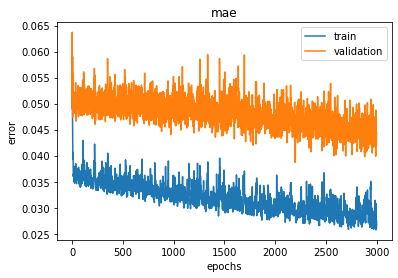

In [9]:
epochs = 1000*3

initial_learning_rate = 1e-4
final_learning_rate = 1e-6
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epochs)
steps_per_epoch = 1

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

def custom_loss(y_true, y_pred):
    a = abs(y_true-y_pred)
    b = tf.math.reduce_mean(a)
    return tf.math.exp(b)-1

model.compile(loss=custom_loss,
          optimizer= keras.optimizers.Adam(1e-4),
          metrics=['mae'])

# new model
history = model.fit([x1, x2, x3], y, validation_split = 0.1, epochs = epochs, verbose =2)

# model learning graph
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mae')
plt.ylabel('error')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

In [6]:
# predictions
p = model.predict([xt1, xt2, xt3])

1/1 [==============================] - 0s 228ms/step


In [7]:
# error
np.reshape(p,(10,)) - yt

array([-0.03410804, -0.76357223, -0.89239109, -0.5104646 , -0.16720629,
       -0.32781031, -0.30918989, -0.01405742,  0.        , -0.37255645])